In [ ]:
"""L'obiettivo di questo esercizio è generare un set di dati di autogenerati
utilizzando le Lib., analizzarli con pandas e visualizzare i risultati
usando Matplotlib. Gli studenti dovranno eseguire le seguenti operazioni:



Generazione dei Dati: Utilizzare NumPy per generare una serie temporale
di 305 giorni di dati, simulando il numero di visitatori giornalieri in
un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel
tempo per simulare l'aumento della popolarità del parco.
Creazione del DataFrame: Creare un DataFrame pandas con le date come
indice e il numero di visitatori come colonna e una collonna casuale
della patologia scelta fra 3(ossa, cuore, testa ).
Analisi dei Dati: Calcolare il numero medio di visitatori per mese e la
deviazione standard e quale patologia è più e quale meno trovata.
Visualizzazione dei Dati:
Creare un grafico a linee del numero di visitatori giornalieri.
Aggiungere al grafico la media mobile a 7 giorni per mostrare la
tendenza settimanale.
Creare un secondo grafico che mostri la media mensile dei visitatori.
creare un grafico che mostri la divisione fra le 3 patologie."""

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [90]:
#1 generazione dati
np.random.seed(50)

In [91]:
#parametri di simulazione 
n_giorni = 305
media_visitatori = 1200
dev_standard= 900

In [92]:
#generazione date
date=pd.date_range(start='2024-01-01', periods=n_giorni, freq='D')

In [ ]:
#generare visitatori giornalieri con trend crescente
trend = np.linspace(0, 300, n_giorni)
visitatori = np.random.normal(loc=media_visitatori, scale=dev_standard, size=n_giorni) + trend


In [94]:
#2.creazione dataframe
#selezione casuale patologie
patologie = np.random.choice(['ossa', 'cuore', 'testa'], size=n_giorni)


In [95]:
#creazione df
df = pd.DataFrame({'data': date, 'visitatori': visitatori, 'patologia': patologie})


In [96]:
#impostazioen df per usare la data come indice
df.set_index('data', inplace=True)
df


,visitatori,patologia
data,,
2024-01-01,-204.316898,testa
2024-01-02,1173.106999,cuore
2024-01-03,643.138103,cuore
2024-01-04,-115.161910,testa
2024-01-05,2474.698878,ossa
...,...,...
2024-10-27,1930.072041,ossa
2024-10-28,2258.021919,cuore
2024-10-29,2531.133333,testa


In [97]:
#3.analisi dati
#media e dev standard mensile
df['Mese'] = df.index.month
statistiche_mensili = df.groupby('Mese')['visitatori'].agg(['mean', 'std'])


In [98]:
#analizzare patologie più o meno frequenti
patologia_frequente = df['patologia'].value_counts().idxmax()
patologia_meno_frequente = df['patologia'].value_counts().idxmin()

In [99]:
#visualizzazione risultati
print(f"Patologia più frequente: {patologia_frequente}")
print(f"Patologia meno frequente: {patologia_meno_frequente}")
print(statistiche_mensili)


Patologia più frequente: cuore
Patologia meno frequente: testa
             mean          std
Mese                          
1     1352.142382   964.560945
2     1303.699862   879.438146
3     1159.938326  1089.231591
4     1101.167702   908.659775
5     1317.706687   880.017257
6     1013.071899   955.396343
7     1413.393468   814.451582
8     1534.005867   933.310921
9     1455.687609   848.596651
10    1476.890500   869.938023


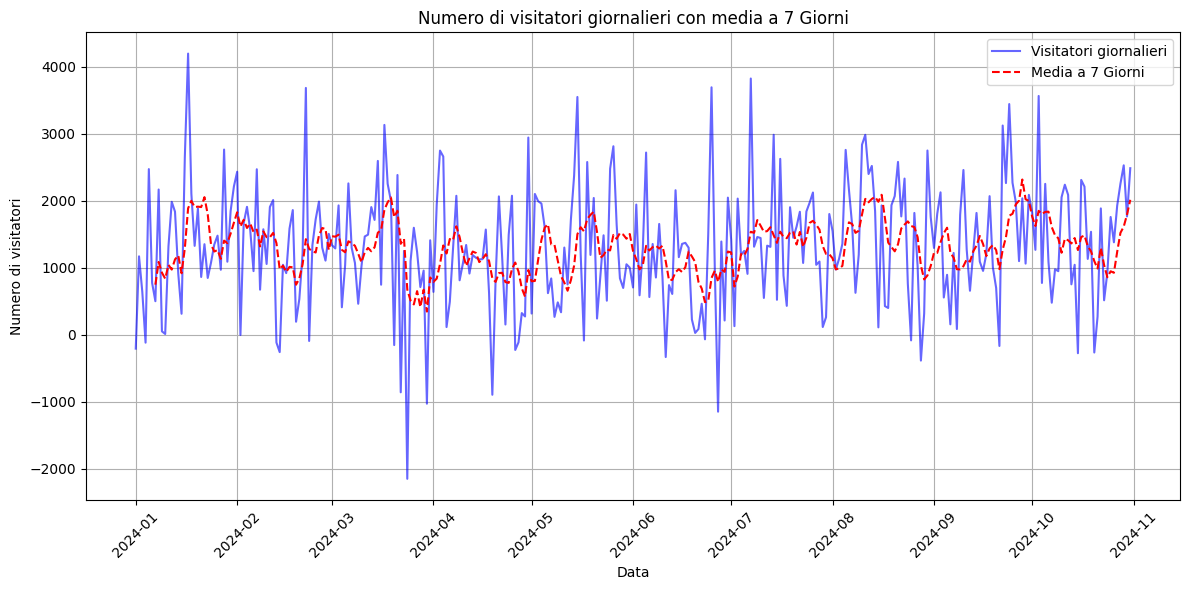

In [100]:
#4.visualizzazione grafica
#grafico numero visitatori giornalieri
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['visitatori'], label='Visitatori giornalieri', color='blue', alpha=0.6)
plt.plot(df.index, df['visitatori'].rolling(window=7).mean(), label='Media a 7 Giorni', color='red', linestyle='--')
plt.title('Numero di visitatori giornalieri con media a 7 Giorni')
plt.xlabel('Data')
plt.ylabel('Numero di visitatori')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


In [ ]:
#dal grafico emerge che il num di visitatori giornalieri è molto variabile, con molti picchi e cali significativi. Nonostante ciò la media mobile a 7 giorni mostra però una tendenza più stabile, 
#evidenziando un trend  generale dei visitqtori. è visibile anche una leggera tendenza crescente nel tempo, forse dovuta all'aumento della popolarità del parco, come indicato nella traccia

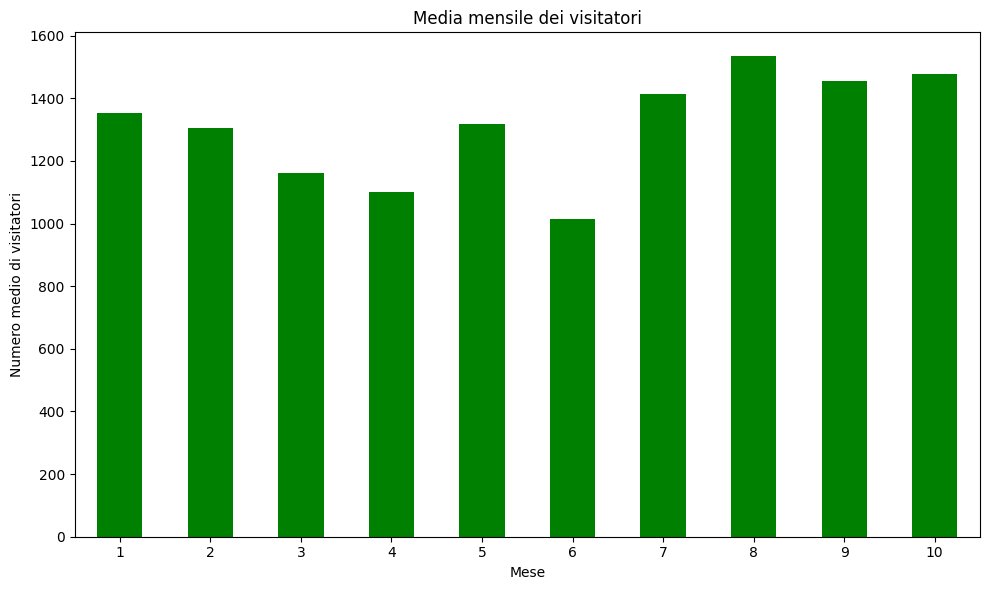

In [102]:
#grafico media mensile visitatori
statistiche_mensili= df.groupby('Mese')['visitatori'].mean()
plt.figure(figsize=(10, 6))
statistiche_mensili.plot(kind='bar', color='green')
plt.title('Media mensile dei visitatori')
plt.xlabel('Mese')
plt.ylabel('Numero medio di visitatori')
plt.xticks(rotation=0)
plt.tight_layout()

In [ ]:
#emerge dal grafico una variaz significativa del num medio di visitatori tra i mesi. per esempio nel mese di agosto si può notare il numero maggiore medio di visitatori, mentre a giugno il minore, 
#fluttuazioni forse dovute a fattori stagionali o specifici eventi. ad esempio in mesi di vacanze potrebbero esserci maggiori incidenti, e in altri mesi potrebbero esserci meno malattie causate 
#da fattori ambientali

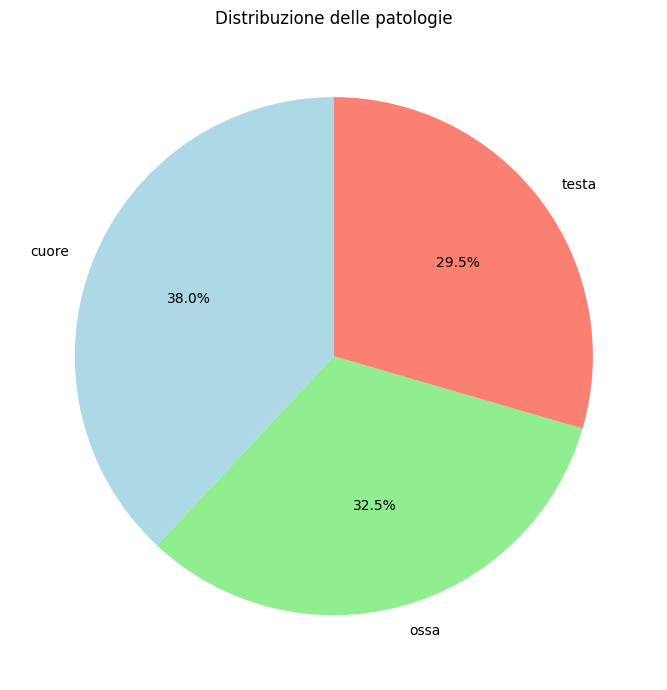

In [103]:
#grafico per la distrib delle patologie
plt.figure(figsize=(7, 7))
df['patologia'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Distribuzione delle patologie')
plt.ylabel('')  # Rimuove l'etichetta di y
plt.tight_layout()


In [ ]:
#dal grafico a torta emenrge che la patologia più comune è legata al cuore, dunque in ospedale potrebbe esserci maggiore incidenza di problemi cardici tra i pazienti. anche le altre due categorie 
#sono però equilibrate, sugggerendo che l'ospedale tratta in maniera quasi equa varietà di condizioni mediche. 

In [ ]:
#EXTRA: età basata sul numero di visitatori
df['Eta'] = np.random.randint(18, 80, size=n_giorni) + (df['visitatori'] / max(df['visitatori']) * 10).astype(int)


In [114]:
#matrice di correlazione
matr_corr=df[['visitatori', 'Eta']].corr()


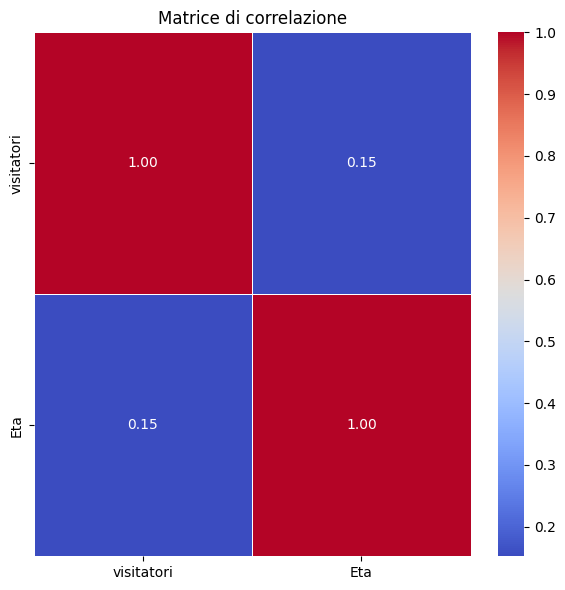

In [115]:
#heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di correlazione')
plt.tight_layout()
plt.show()